In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:


data = pd.read_csv('artifact/sentiment_analysis.csv')



In [5]:
data.head

<bound method NDFrame.head of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

Data Preprocessing

In [6]:


data.shape



(7920, 3)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:


data.isnull().sum()



id       0
label    0
tweet    0
dtype: int64

Text Preprocessing

In [9]:


import re
import string



In [13]:


data["tweet"].head(5)



0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

remove links

In [15]:


data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [16]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [17]:


string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [19]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [20]:


data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10404\4147664103.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [21]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [22]:


!pip install nltk



  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl (273 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   -------

In [23]:
import nltk

In [25]:


nltk.download('stopwords', download_dir='static/model')



[nltk_data] Downloading package stopwords to static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:


with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()



In [27]:


data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))



In [28]:


data["tweet"].head()



0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [29]:


from nltk.stem import PorterStemmer
ps = PorterStemmer()



In [30]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [31]:


data["tweet"].head()



0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [32]:


data



,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


Building Vacabulary

In [33]:


from collections import Counter
vocab = Counter()



In [34]:
vocab

Counter()

In [35]:


for sentence in data['tweet']:
    vocab.update(sentence.split())



In [36]:


len(vocab)



15949

In [37]:


data.shape



(7920, 3)

In [38]:


tokens = [key for key in vocab if vocab[key] > 10]



In [39]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [40]:


def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'static/model/vocabulary.txt')



Divide dataset

In [41]:


X = data['tweet']
y = data['label']



In [42]:


!pip install scikit-learn



  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl (10.7 MB)
Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl (38.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -----------------

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:


X_train



6324    weekend weekend picoftheday shoot shoot tfp tf...
1364    emagi theyv said theyr onto quidco rub inos ic...
1291    prob keep iphon switch plan kinda want window ...
3288    tgtweet take gander appl sinist compani mani w...
353     top photo app avail … photographi usa woman po...
                              ...                        
5294    call karma last month macbookpro hang window l...
3744    new quot make best mistak quot lyric lifeofthe...
862     good birthday purchas happi applewatch spacegr...
7146    samsung micromax allthos cheap android make de...
6046    pretti pan side abouttonight birthdayparti bos...
Name: tweet, Length: 6336, dtype: object

In [45]:


X_test



5406    pc exquisit squishi random charm iphon strap t...
2242    multitask phone android samsung facebook twitt...
2475    blow phone like nintendo video cartridg charg ...
4572    jailbrok iphon love good app cydina httpcligsg...
6574    birthday boss samsung thai samsung electron co...
                              ...                        
1076    long island longisland icetea liit cocktail th...
4149    hack wifi prank android app unitedst cute colo...
5446    mailbag rhyme wag gag lag rag sag tag click rh...
5358    yey thank beb love mwah valentin day best gift...
4885    speed net android app unitedst cute color ipho...
Name: tweet, Length: 1584, dtype: object

Vectorization

In [46]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [47]:
vectorized_x_train = vectorizer(X_train, tokens)

In [48]:
vectorized_x_test = vectorizer(X_test, tokens)

In [49]:


vectorized_x_train



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [50]:


y_train



6324    0
1364    1
1291    1
3288    1
353     0
       ..
5294    1
3744    0
862     0
7146    0
6046    0
Name: label, Length: 6336, dtype: int64

In [51]:
vectorized_x_test



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [52]:


y_test



5406    0
2242    0
2475    1
4572    0
6574    0
       ..
1076    0
4149    0
5446    0
5358    0
4885    0
Name: label, Length: 1584, dtype: int64

In [53]:


y_train.value_counts()



label
0    4731
1    1605
Name: count, dtype: int64

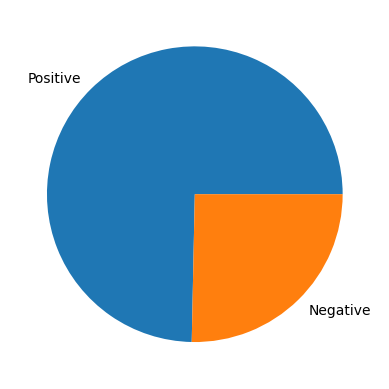

In [54]:


plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()



Handle imbalanced dataset

In [55]:
!pip install imbalanced-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.7.0

    Uninstalling scikit-learn-1.7.0:

      Successfully uninstalled scikit-learn-1.7.0

   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 

  You can safely remove it manually.


In [64]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)



(9462, 1145) (9462,)


In [65]:
y_train_smote.value_counts()

label
0    4731
1    4731
Name: count, dtype: int64

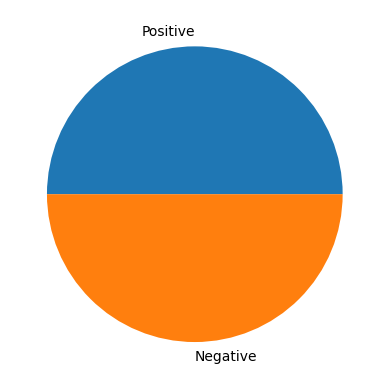

In [66]:


plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()



In [67]:


vectorized_x_train_smote



array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.14423539, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(9462, 1145), dtype=float32)

In [68]:
y_train_smote

0       0
1       1
2       1
3       1
4       0
       ..
9457    1
9458    1
9459    1
9460    1
9461    1
Name: label, Length: 9462, dtype: int64

In [69]:


vectorized_x_test



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [70]:
y_test

5406    0
2242    0
2475    1
4572    0
6574    0
       ..
1076    0
4149    0
5446    0
5358    0
4885    0
Name: label, Length: 1584, dtype: int64

Model Training and Evaluation

In [72]:


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [73]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [74]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.937
	Precision = 0.916
	Recall = 0.963
	F1-Score = 0.939
Testing Scores:
	Accuracy = 0.876
	Precision = 0.72
	Recall = 0.869
	F1-Score = 0.788


Naive Bayes

In [76]:


mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)



Training Scores:
	Accuracy = 0.907
	Precision = 0.869
	Recall = 0.958
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.874
	Precision = 0.702
	Recall = 0.912
	F1-Score = 0.793


Decision Tree

In [78]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.824
	Precision = 0.684
	Recall = 0.627
	F1-Score = 0.654


Random Forest

In [79]:


rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)



Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.856
	Precision = 0.752
	Recall = 0.684
	F1-Score = 0.716


Support Vector Machine

In [80]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.965
	Recall = 0.995
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.871
	Precision = 0.74
	Recall = 0.791
	F1-Score = 0.765


In [81]:


import pickle

with open('static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)

